# [3 Data visualisation](https://r4ds.had.co.nz/data-visualisation.html)

> “The simple graph has brought more information to the data analyst’s mind than any other device.”
> <br><cite>— John Tukey</cite>

> ggplot2 implements the **grammar of graphics**, a coherent system for describing and building graphs.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



> Let’s use our first graph to answer a question: Do cars with big engines use more fuel than cars with small engines? You probably already have an answer, but try to make your answer precise. What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?

> `mpg` contains observations collected by the US Environmental Protection Agency on 38 models of car.

In [2]:
?mpg
set.seed(0); sample_n(mpg, 5)
summary(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact
jeep,grand cherokee 4wd,5.7,2008,8,auto(l5),4,13,18,r,suv
subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

mpg {ggplot2},R Documentation


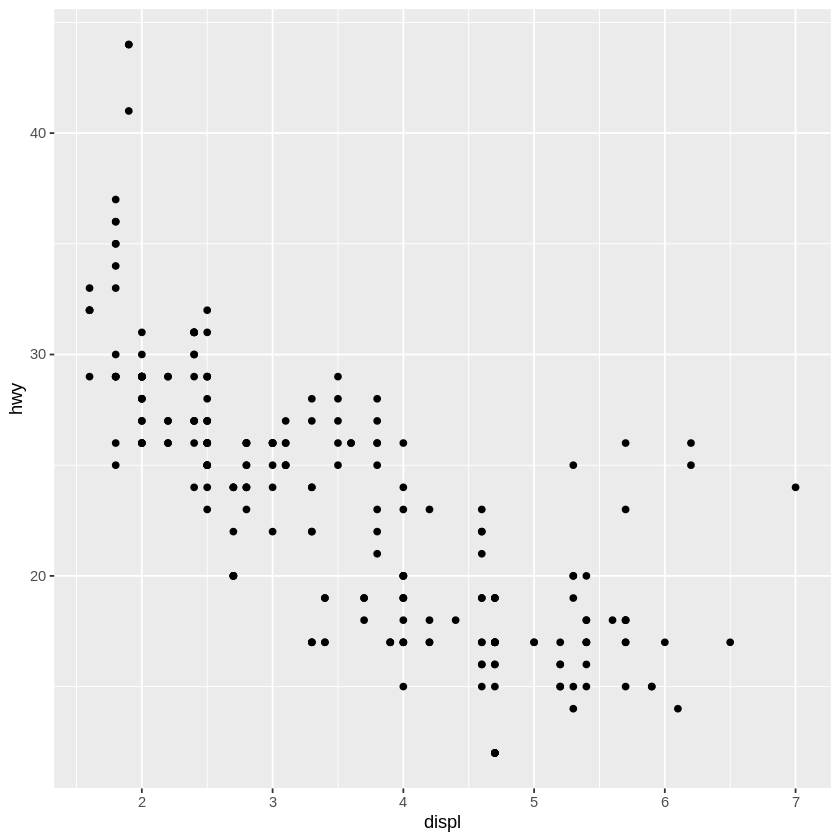

In [3]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

> The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel.

## 3.2.4 Exercises

> 4. Make a scatterplot of `hwy` vs `cyl`.

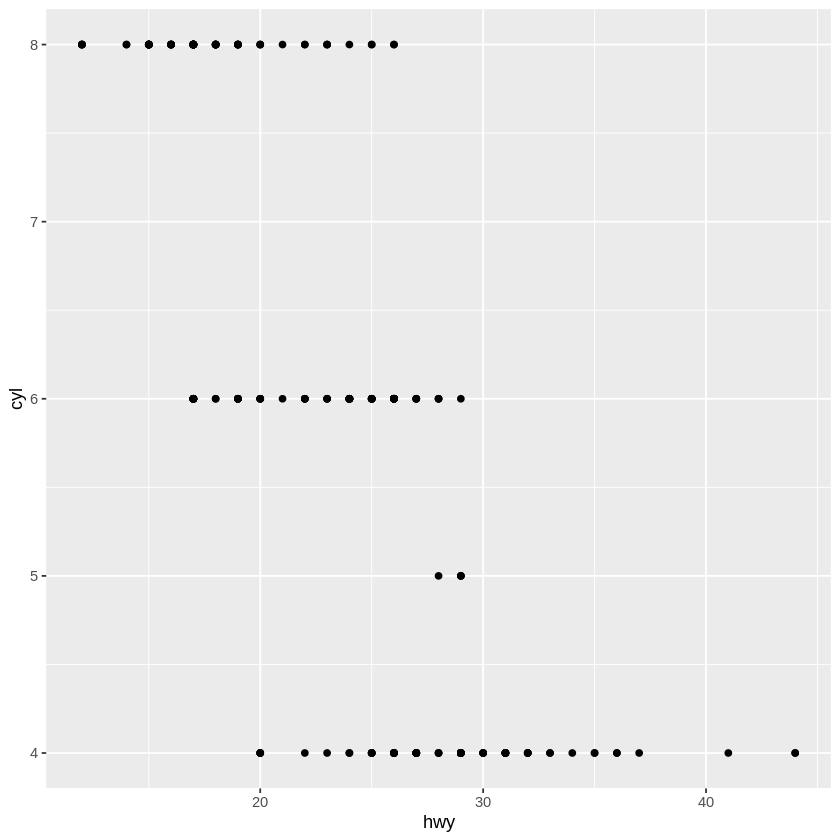

In [4]:
qplot(hwy, cyl, data = mpg)

> 5. What happens if you make a scatterplot of class vs drv? Why is the plot not useful?

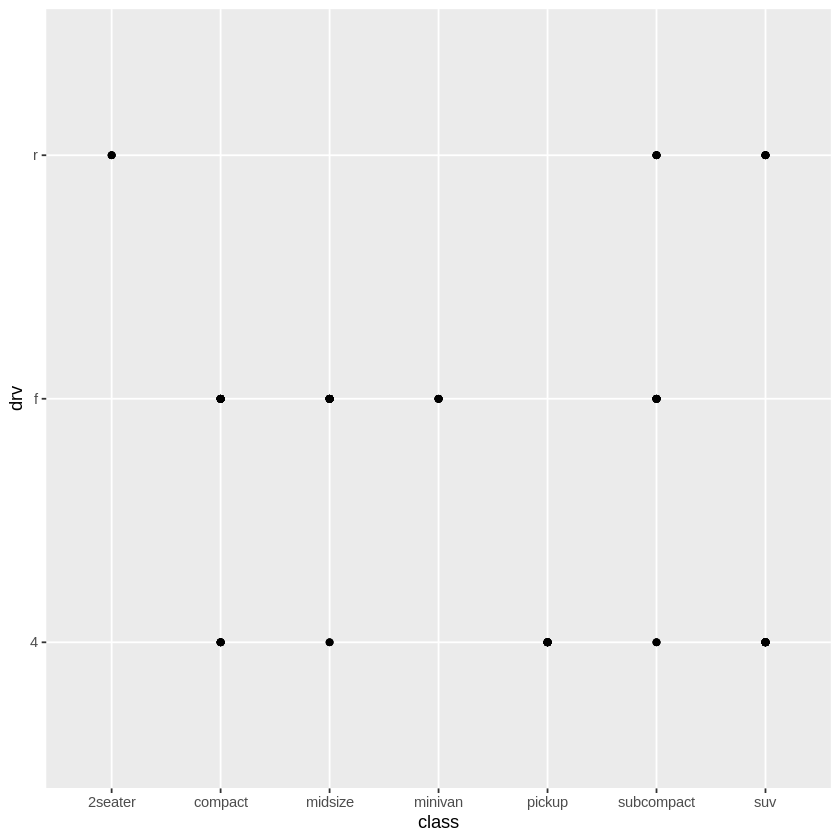

In [5]:
qplot(class, drv, data = mpg)

## 3.3 Aesthetic mappings

> “The greatest value of a picture is when it forces us to notice what we never expected to see.”
> <br><cite>— John Tukey</cite>

> You can add a third variable, like `class`, to a two dimensional scatterplot by mapping it to an **aesthetic**. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word “value” to describe data, let’s use the word “level” to describe aesthetic properties. 

> ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as **scaling**.

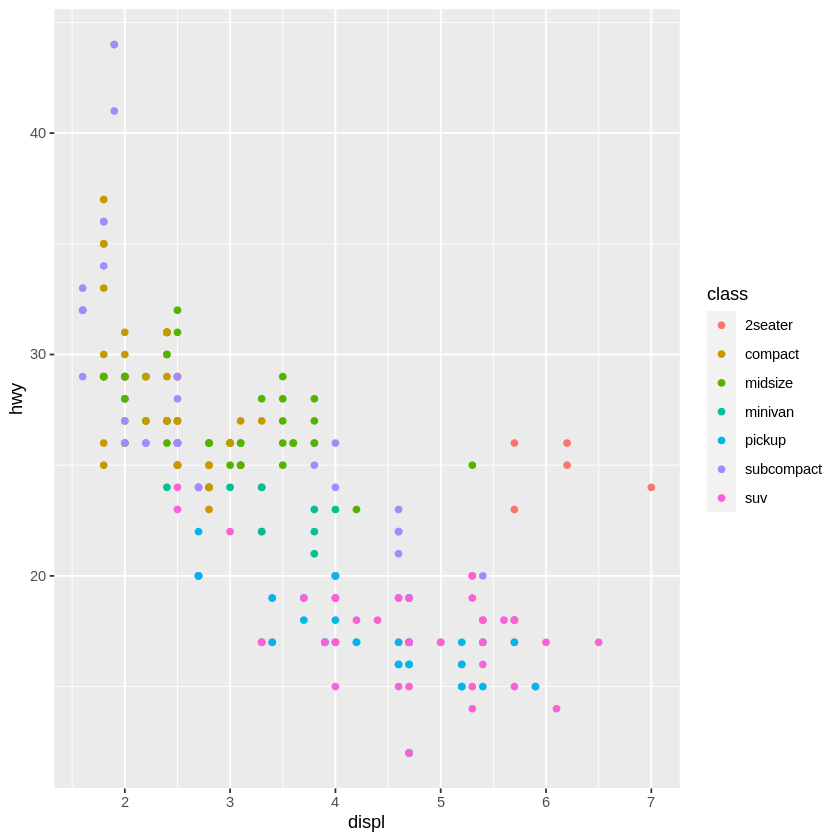

In [6]:
qplot(displ, hwy, aes(color = class), data = mpg)

## 3.5 Facets

> One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into **facets**, subplots that each display one subset of the data.

In [7]:
select_if(mpg, is.character) %>% names

[1] "manufacturer" "model"        "trans"        "drv"          "fl"          
[6] "class"

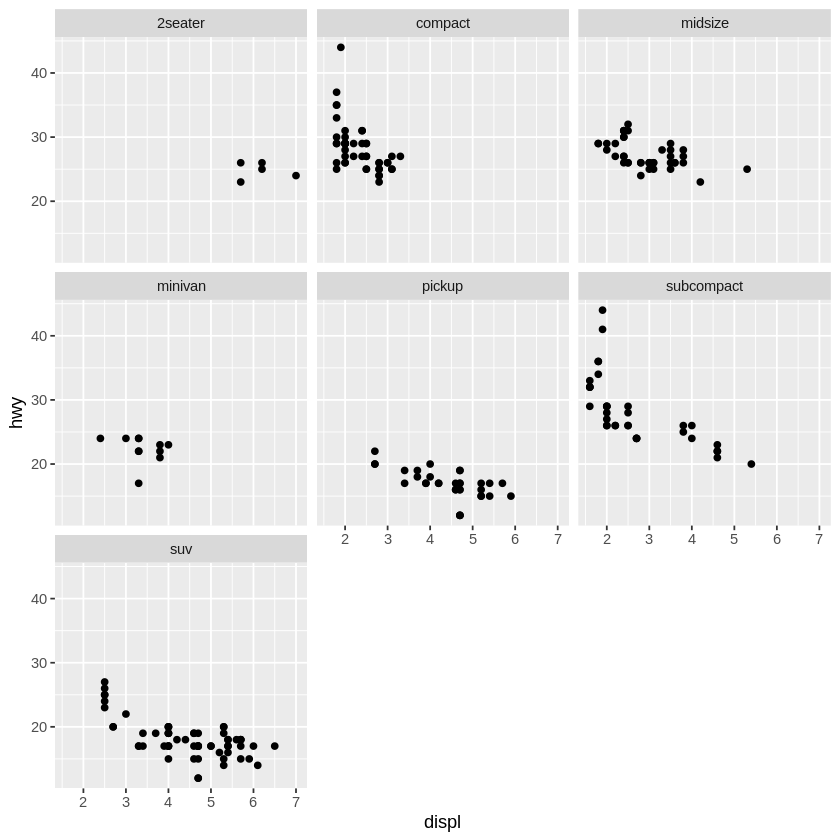

In [8]:
qplot(displ, hwy, data = mpg) + facet_wrap(~class, nrow = 3)

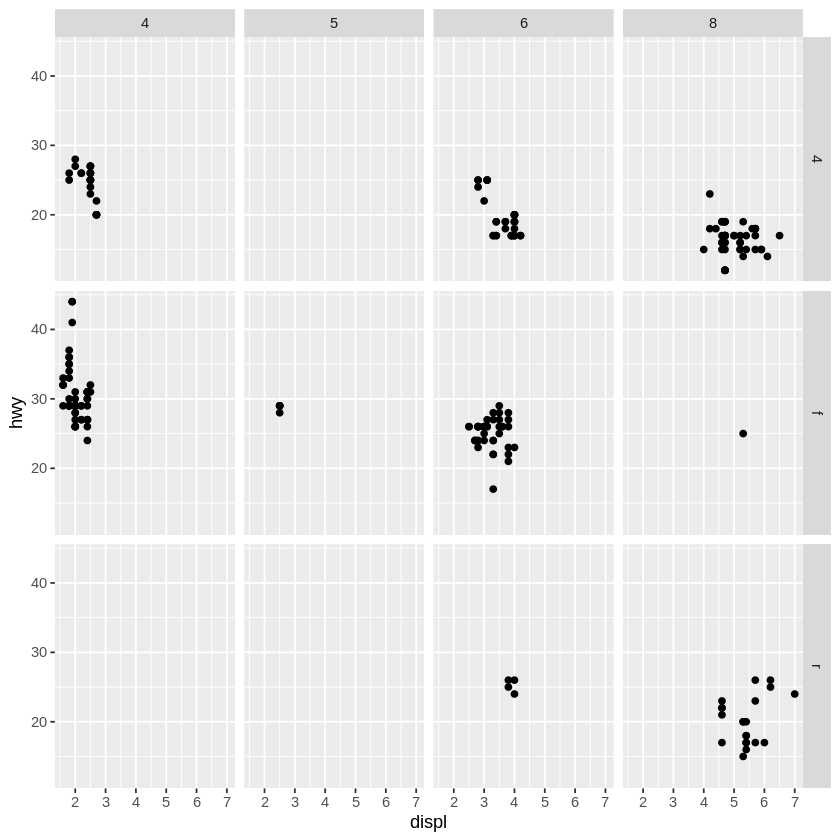

In [9]:
qplot(displ, hwy, data = mpg) + facet_grid(drv~cyl)

> If you prefer to not facet in the rows or columns dimension, use a `.` instead of a variable name, e.g. `+ facet_grid(. ~ cyl)`.

## 3.6 Geometric objects

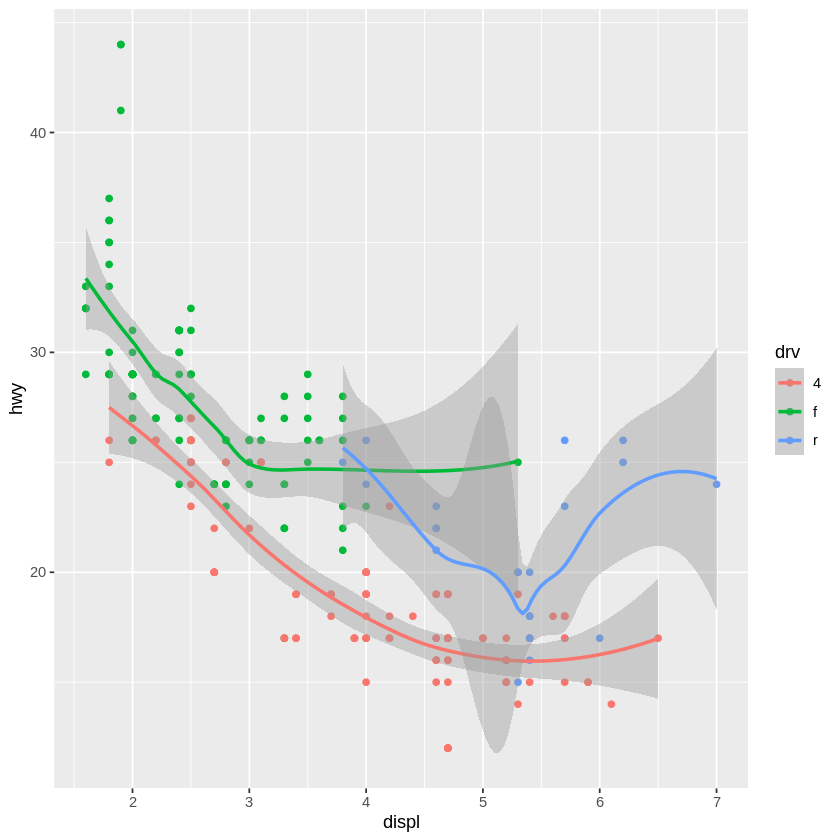

In [10]:
ggplot(mpg, aes(x = displ, y = hwy, color = drv)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method = "loess")

## 3.7 Statistical transformations

> Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:
> - bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.
> - smoothers fit a model to your data and then plot predictions from the model.
> - boxplots compute a robust summary of the distribution and then display a specially formatted box.
>
> The algorithm used to calculate new values for a graph is called a **stat**, short for statistical transformation.
>
> You can generally use geoms and stats interchangeably.

function (mapping = NULL, data = NULL, stat = "count", position = "stack", 
    ..., width = NULL, binwidth = NULL, na.rm = FALSE, orientation = NA, 
    show.legend = NA, inherit.aes = TRUE) 
NULL

        cut       
 Fair     : 1610  
 Good     : 4906  
 Very Good:12082  
 Premium  :13791  
 Ideal    :21551  

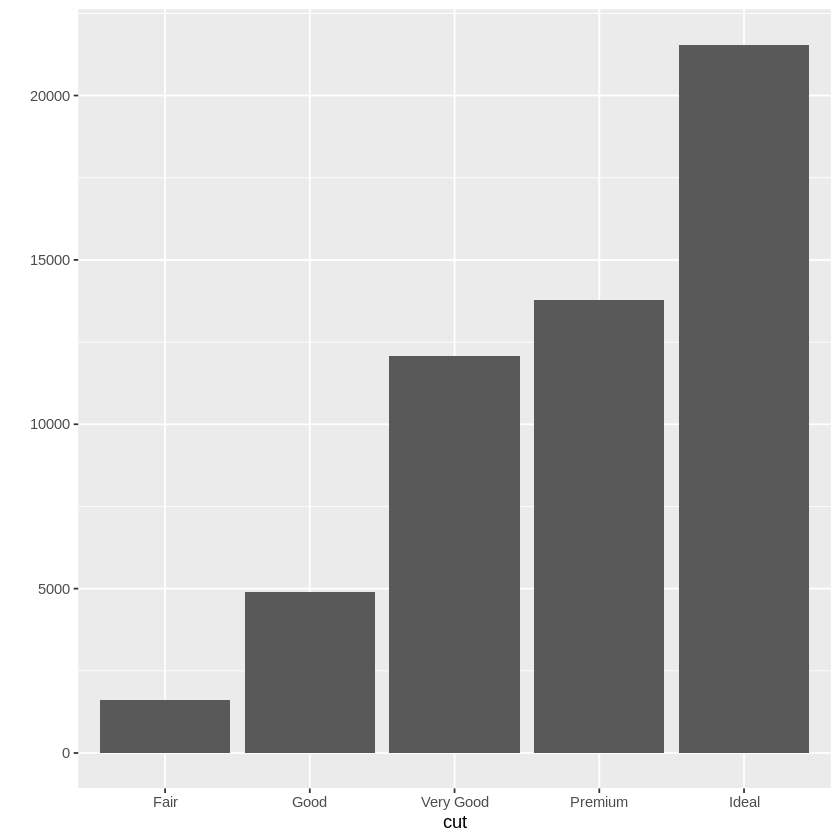

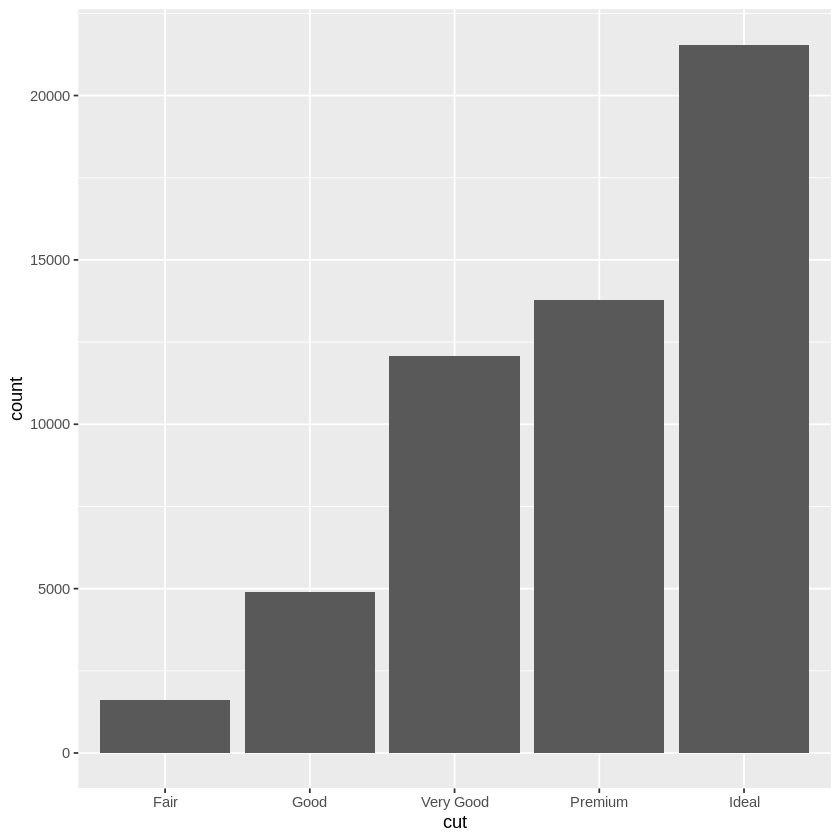

In [11]:
args(geom_bar)
summary(select(diamonds, cut))

qplot(cut, data = diamonds)

ggplot(diamonds) + stat_count(aes(x = cut))

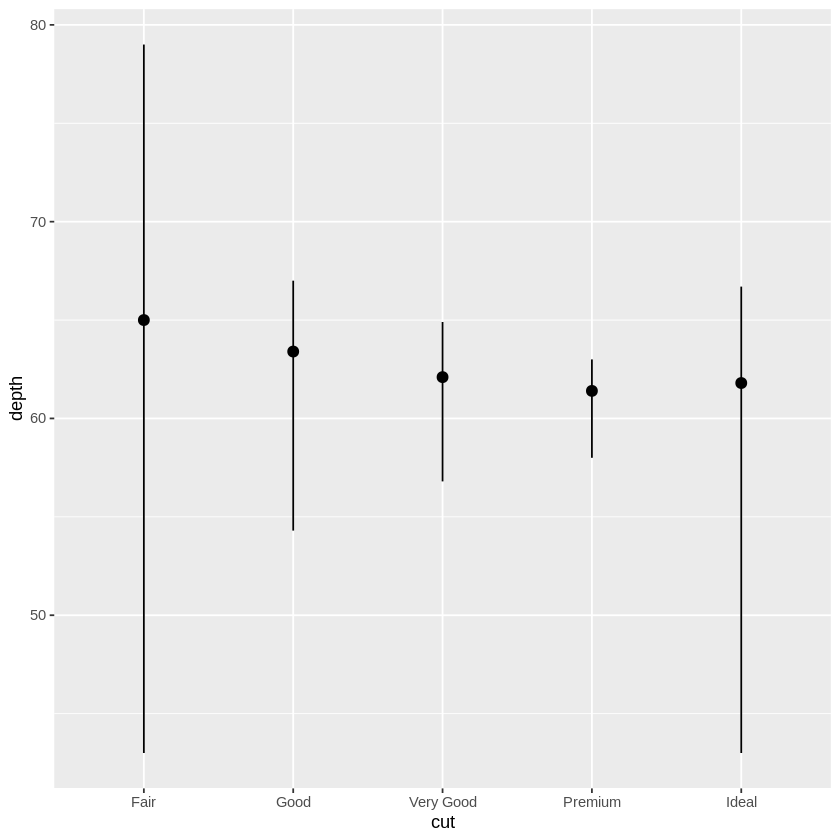

In [12]:
ggplot(diamonds) + stat_summary(
  aes(x = cut, y = depth),
  fun = median,
  fun.max = max,
  fun.min = min,
)

## 3.8 Position adjustments

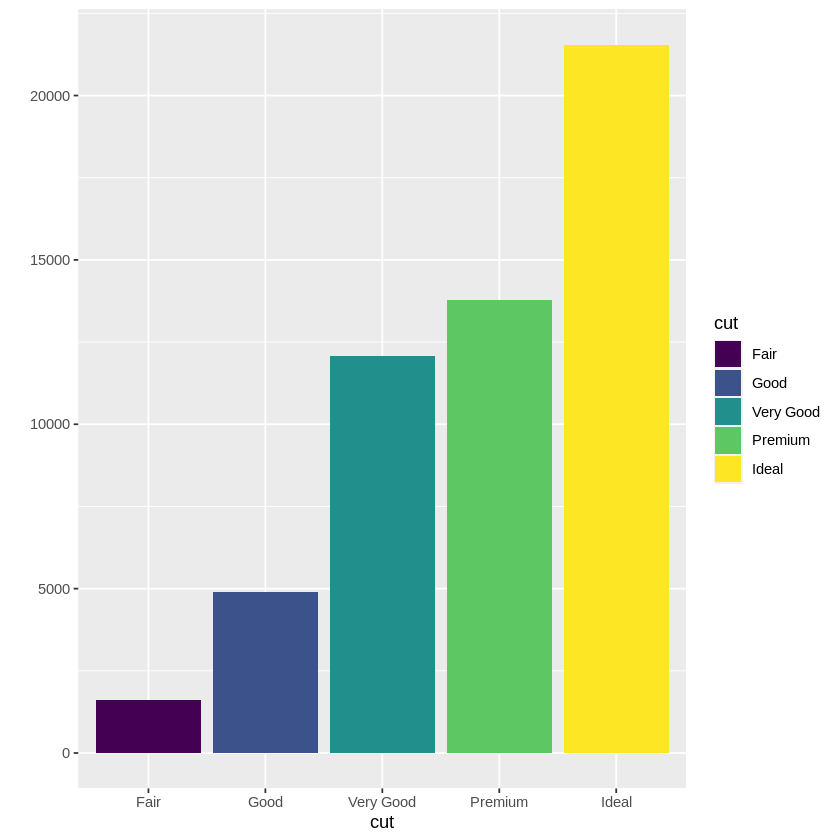

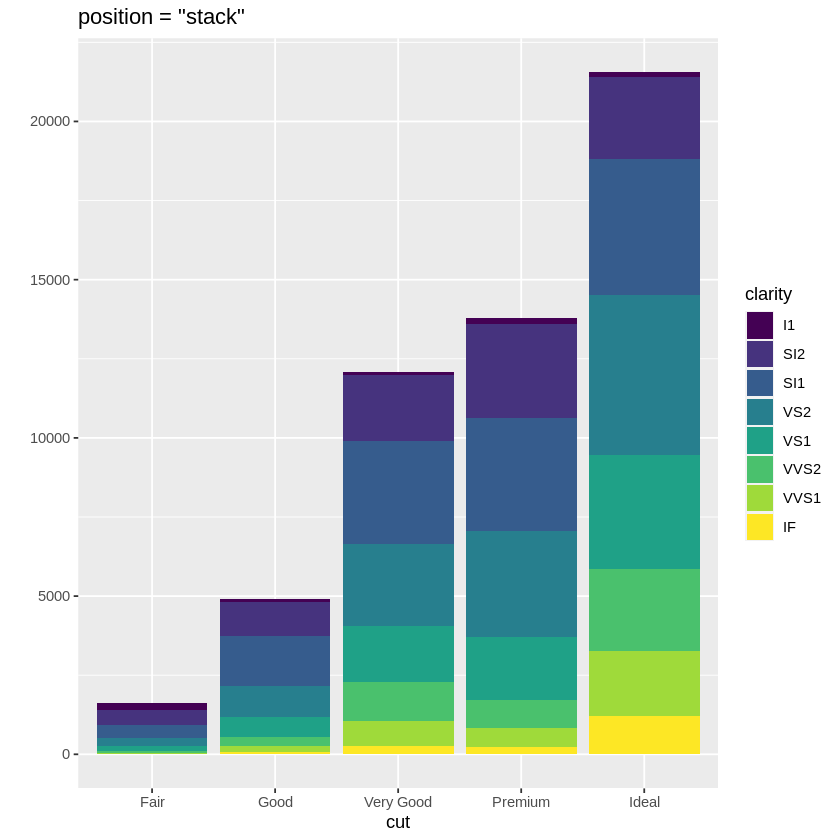

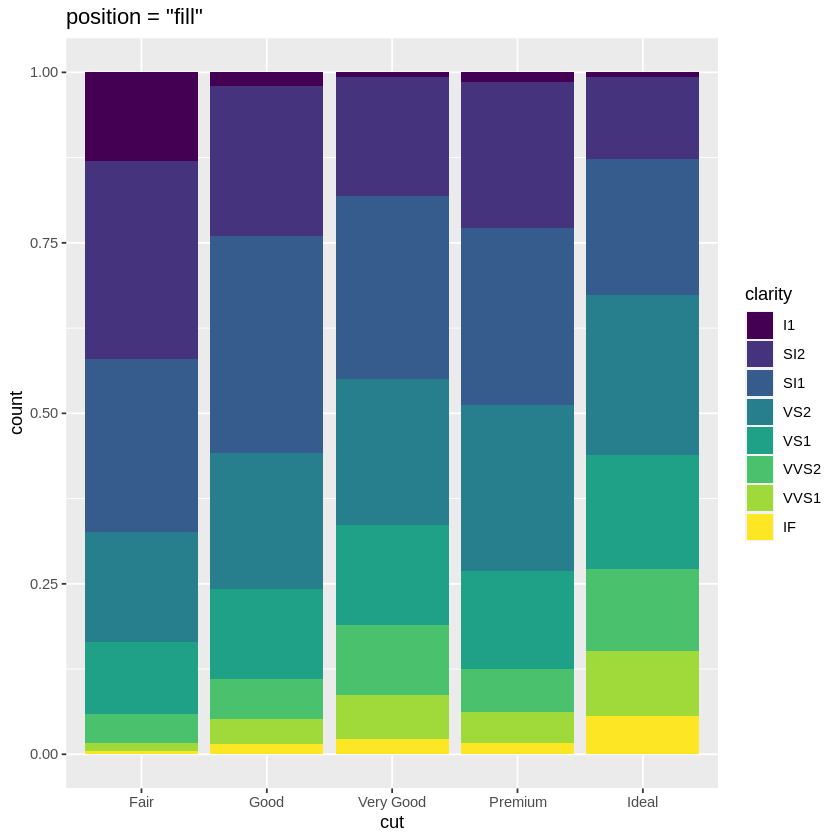

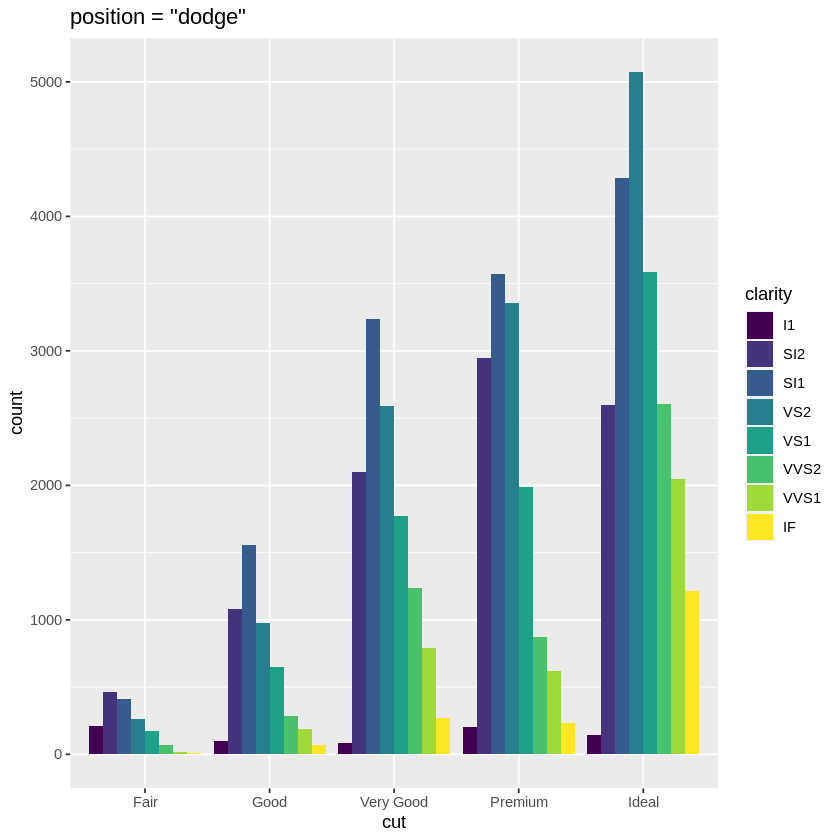

In [13]:
qplot(cut, fill = cut, data = diamonds)
qplot(cut, fill = clarity, data = diamonds) + labs(title = 'position = "stack"')
ggplot(diamonds) +
  geom_bar(aes(x = cut, fill = clarity), position = "fill") +
  labs(title = 'position = "fill"')
ggplot(diamonds) +
  geom_bar(aes(x = cut, fill = clarity), position = "dodge") +
  labs(title = 'position = "dodge"')

> Recall our first scatterplot. Did you notice that the plot displays only 126 points, even though there are 234 observations in the dataset? The values of `hwy` and `displ` are rounded so the points appear on a grid and many points overlap each other. This problem is known as **overplotting**.
>
> You can avoid this gridding by setting the position adjustment to “jitter”. `position = "jitter"` adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise.

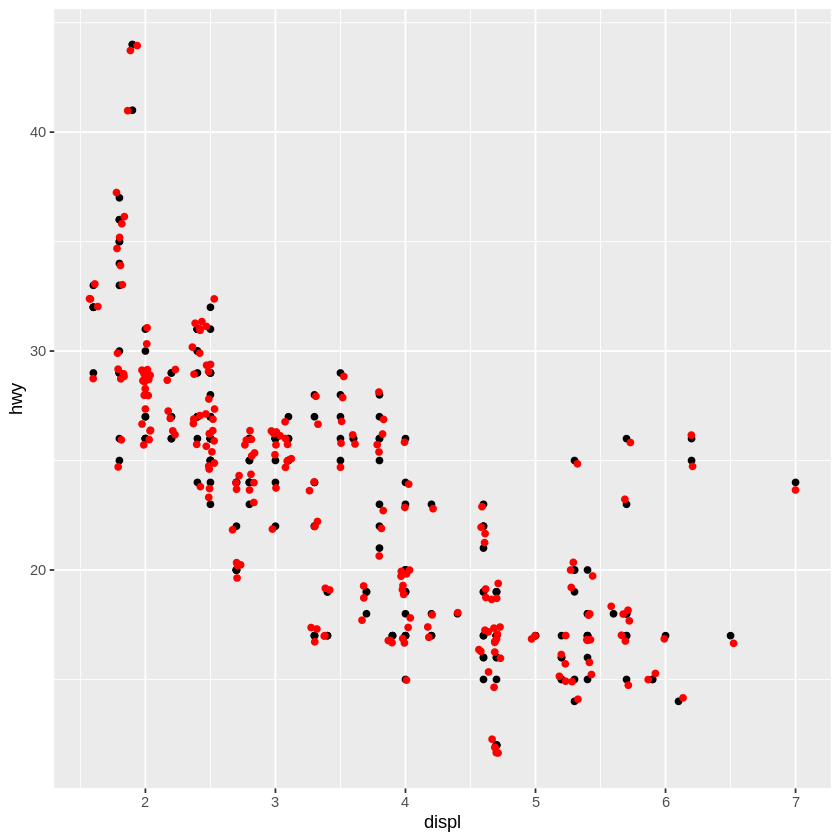

In [14]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_jitter(color = "red")

## 3.9 Coordinate systems

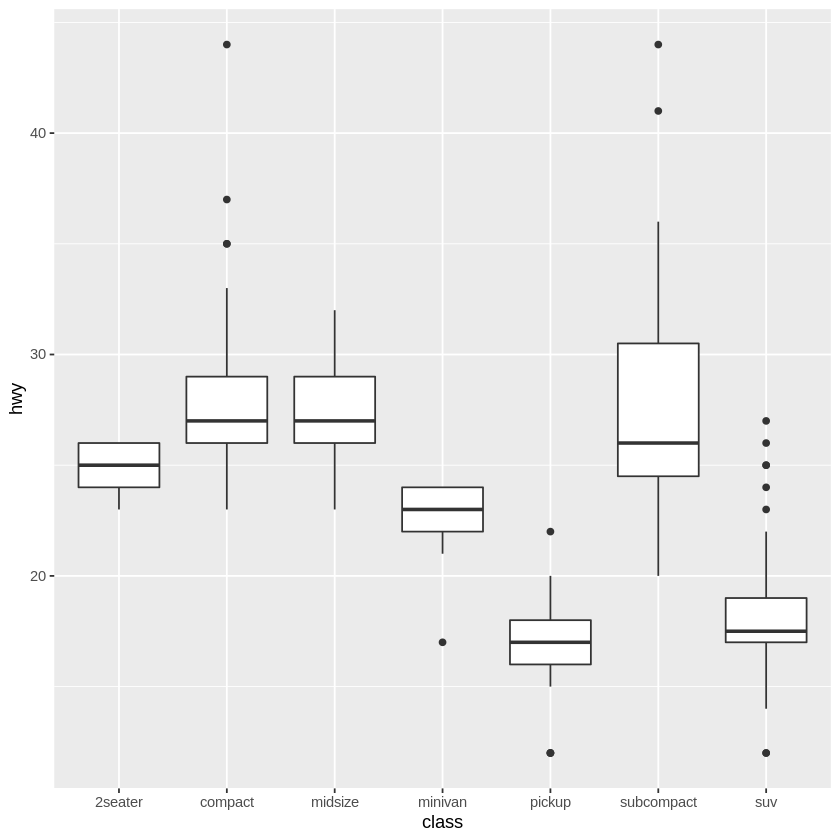

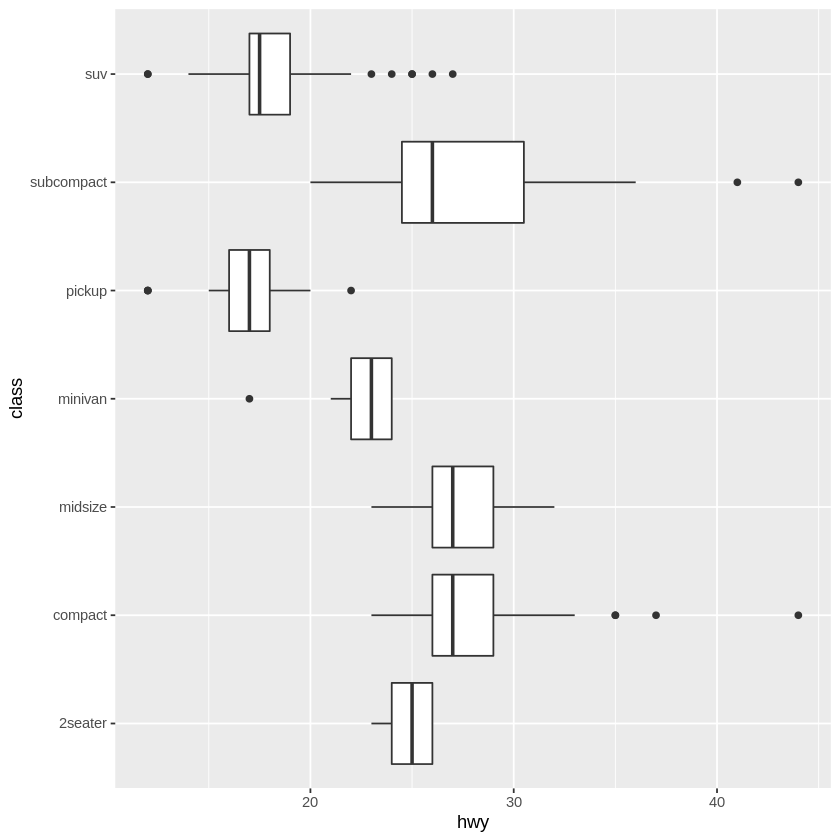

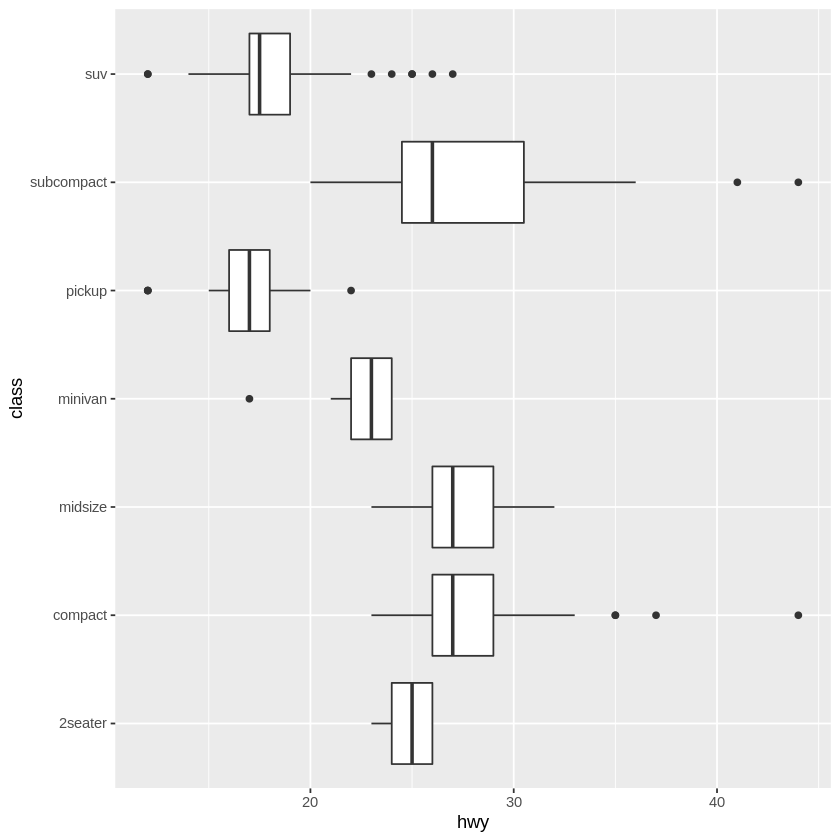

In [15]:
qplot(class, hwy, data = mpg, geom = "boxplot")
qplot(hwy, class, data = mpg, geom = "boxplot")
qplot(class, hwy, data = mpg, geom = "boxplot") + coord_flip()

In [16]:
install.packages("maps")
nz <- map_data("nz")
names(nz)
?nz

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



[1] "long"      "lat"       "group"     "order"     "region"    "subregion"

nz {maps},R Documentation


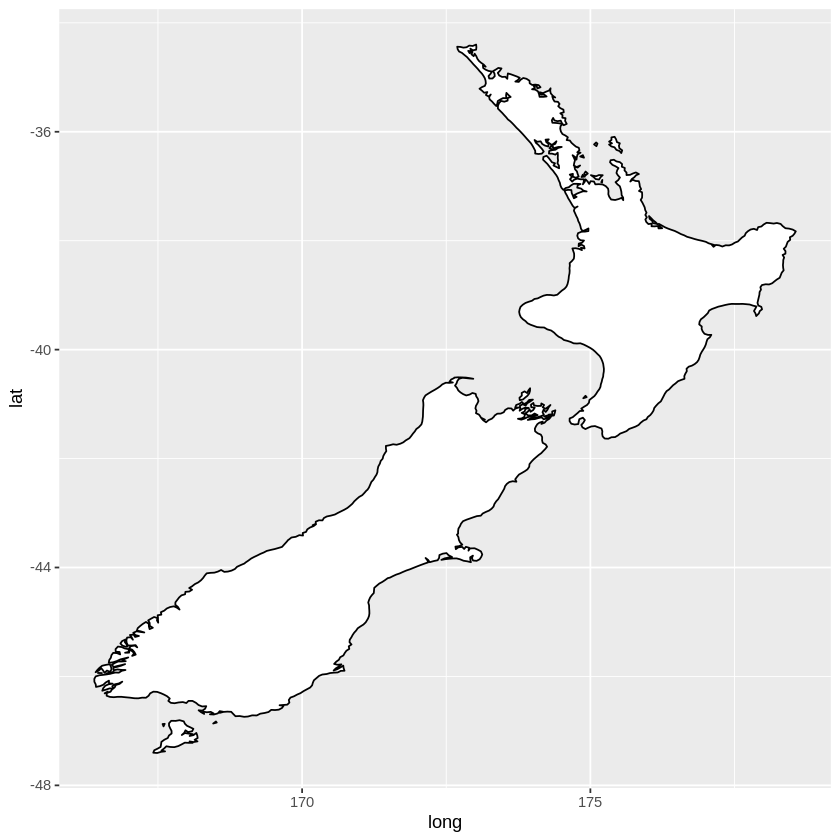

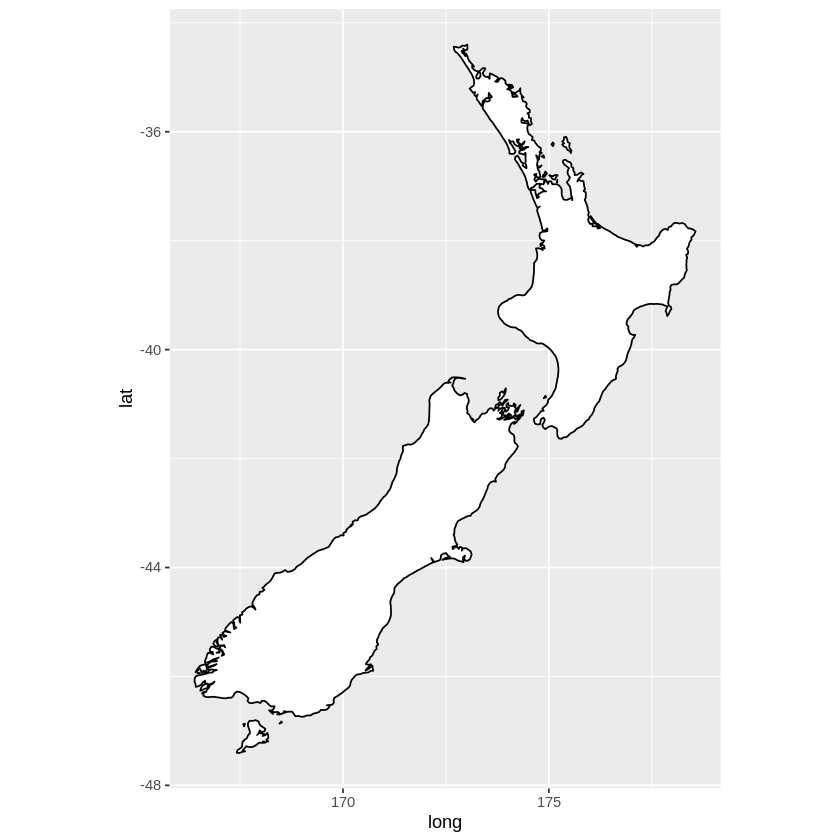

In [17]:
ggplot(nz, aes(long, lat, group = group)) + geom_polygon(color = "black", fill = "white")
ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(color = "black", fill = "white") +
  coord_quickmap()

> Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart.

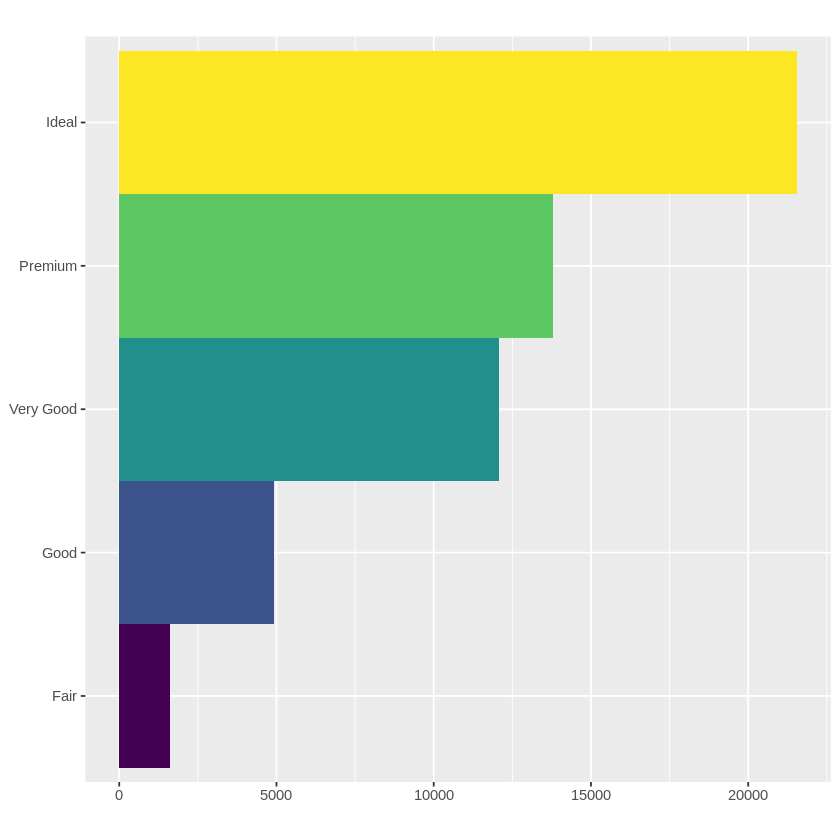

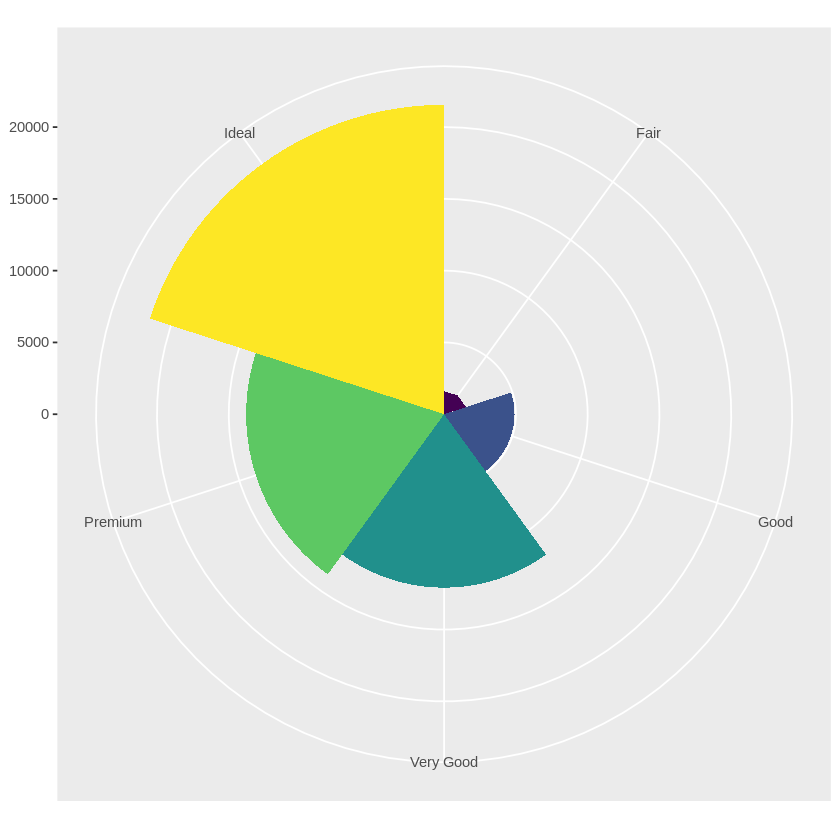

In [18]:
bar <- ggplot(diamonds, aes(cut, fill = cut)) +
  geom_bar(show.legend = FALSE, width = 1) +
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)
bar + coord_flip()
bar + coord_polar()

## 3.10 The layered grammar of graphics

```
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>, 
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

> The seven parameters in the template compose the grammar of graphics, a formal system for building plots. The grammar of graphics is based on the insight that you can uniquely describe *any* plot as a combination of a dataset, a geom, a set of mappings, a stat, a position adjustment, a coordinate system, and a faceting scheme.
>
> You could use this method to build *any* plot that you imagine. In other words, you can use the code template that you’ve learned in this chapter to build hundreds of thousands of unique plots.